In [3]:
import numpy as np
import pandas as pd  
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
import os 
from scipy import stats 
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.colors
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor 
from sklearn.datasets import make_classification
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from matplotlib.pyplot import figure

In [5]:
comp = pd.read_csv('Compositions.csv') #import of Composition datasheet with PbBr2, Cs-Oleate, Aceton Mixtures

In [6]:
Pb = np.array(comp['PbBr2  (mL)']) #PbBr2 vector
Pb = np.reshape(Pb, (Pb.shape[0],1))
#print(Pb)
Cs = np.array(comp['Cs-oleate (mL)']) #Cs-oleate vector 
Cs = np.reshape(Cs, (Cs.shape[0],1))
#print(Cs)
Ac = np.array(comp['Aceton (mL)']) #Aceton vector
Ac = np.reshape(Ac, (Ac.shape[0],1))
inputs=np.array([Pb,Cs,Ac]).T 

In [7]:
i=1;
m_size=221
m_list = [*range(1, m_size, 1)] #Select range 

S1c=[]

Wvl=[]

S_wvl=[*range(1,m_size,1)] #Initialize array where Largest Wavelength of csv will be stored 
S_wvl=np.array(S_wvl) 

S_mx=[*range(1,m_size,1)] #Initialize array where Largest Wavelength of csv will be stored 
S_mx=np.array(S_mx)

k=os.path.abspath("Data")
n=0
for i in m_list:
    dat1=pd.read_csv(k+'\\'+ str(i)+'.csv') #Import of Data 
    dat1=dat1[1:] #Ignores first line
    
    Wv =np.array(dat1['Wavelength']) #Extraction of Wavelength in csv i
    Wv = np.reshape(Wv, (Wv.shape[0],1))
    Wv = np.array(Wv,dtype=float)
    
    Wvl.append(Wv) #Stored in Wvl  
    
    S_1c = np.array(dat1['S1c / R1c']) #Store Maximum absorption into S_1c
    S_1c = np.reshape(S_1c, (S_1c.shape[0],1)) 
    S_1c = np.array(S_1c,dtype=float) #changes type to float
    
    S1c.append(S_1c)#Stored in S1c
    
    S_1c_max=np.max(S_1c)  # Maximum absorption value 
    ind=np.argmax(S_1c)    #Index of Highest absorption value
    
    S_mx[i-1]=S_1c_max     #Store Maximum absorption value into array
    S_mx = np.reshape(S_mx, (S_mx.shape[0],1)) #Reshapes array into a column
                            
    S_wvl[i-1]= Wv[ind]     #Wavelength of highest value 
    S_wvl = np.reshape(S_wvl, (S_wvl.shape[0],1)) #Reshape array into column

In [8]:
print(S_wvl[214-1]) 

[460]


Text(0.5, 1.0, 'Relation between \n wavelength and Absorption')

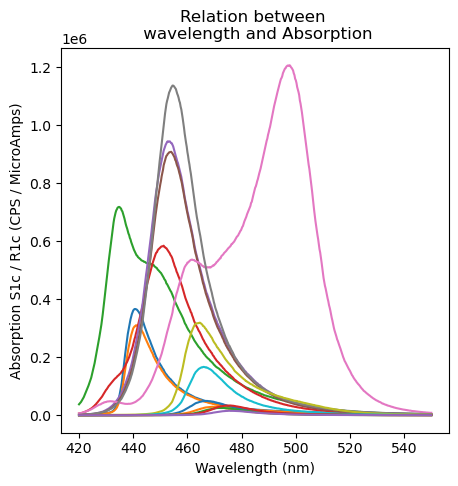

In [9]:
plt.figure(figsize=(5,5))
i=0;
n=15; #Change number to control lower limit of data being plot
m=30; #Change number to control upper limit of data being plot
m_lt = [*range(n, m, 1)] 
for i in m_lt: #x,y
    plt.plot(Wvl[i],S1c[i],'-')
plt.ylabel('Absorption S1c / R1c (CPS / MicroAmps)')
plt.xlabel('Wavelength (nm)')
plt.title('Relation between \n wavelength and Absorption')

In [10]:
print("Task 1")
print("Neural Network")

Task 1
Neural Network


In [11]:
S_wvl = np.array(S_wvl)
S_wvl = np.reshape(S_wvl, (S_wvl.shape[0],1)) #Turn into array 

inputs = np.array(inputs)
inputs=  np.reshape(inputs,(220,3)) #reshape vector

In [12]:
print("Value of Wavelength normalized")
min_Wvl=float(min(S_wvl))
max_Wvl=float(max(S_wvl))
Wvl_norm=[*range(1,221,1)]
#(S_wvl[i])-min_Wvl)/(max_Wvl-min_Wvl)

for i in range(S_wvl.shape[0]):
    Wvl_norm[i]=(float(S_wvl[i])-min_Wvl)/(max_Wvl-min_Wvl)

print("Min_Wvl: " , min_Wvl)
print("Max_Wvl: " , max_Wvl)
Wvl_norm=np.array(Wvl_norm)

Value of Wavelength normalized
Min_Wvl:  430.0
Max_Wvl:  532.0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, S_wvl, test_size=0.2, random_state=42) #Change random state in loop and then do same thing again 
#X_train, X_test, y_train, y_test = train_test_split(inputs, Wvl_norm, test_size=0.05, random_state=42) #with normaalized inputs


In [14]:
class Network(nn.Module):

    def __init__(self):
        super().__init__()
        
        self.linear_layers = Sequential(nn.Linear(in_features=3, out_features=5),) 
        self.linear_layers1 = Sequential(nn.Linear(in_features=5, out_features=5),) 
        self.linear_layers2 = Sequential(nn.Linear(in_features=5, out_features=5),) 
        self.linear_layers3 = Sequential(nn.Linear(in_features=5, out_features=5),) 

        self.out = nn.Linear(5,1)

    def forward(self,x):

        x = torch.nn.functional.silu(self.linear_layers(x)) #Sigmoid Linear Unit 
        x = torch.nn.functional.silu(self.linear_layers1(x)) #Sigmoid Linear Unit 
        x = torch.nn.functional.relu(self.linear_layers2(x)) #Rectified Linear Unit (ReLU)
        x = torch.nn.functional.relu(self.linear_layers3(x)) #Rectified Linear Unit (ReLU)

        x = torch.nn.functional.elu(self.out(x)) # 
        return x
    
net = Network()  

In [15]:
params = list(net.parameters())
print(len(params))
print(params[0].size())
print(y_test.size)

10
torch.Size([5, 3])
44


In [16]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)


X_train_py=torch.tensor(X_train).float()
X_test_py=torch.tensor(X_test).float()
y_train_py=torch.tensor(y_train).float()
y_test_py=torch.tensor(y_test).float()


In [20]:
from torch.optim import Adam # Adam optimization algorithm 

optm = Adam(net.parameters(), lr = 0.1)

EPOCHS = 500 # Number of iterations 
BATCH_SIZE = 16
crit=nn.MSELoss()

In [22]:

net.to(device)
X_train_py = X_train_py.to(device)
y_train_py= y_train_py.to(device)
X_test_py= X_test_py.to(device)
y_test_py= y_test_py.to(device)


for epoch in range(EPOCHS):    
    epoch_loss_py = 0
    
    net.zero_grad()
    output_py = net(X_train_py.float()) #model called
    loss_py =crit(output_py,y_train_py) #Evaluate prediction 
    loss_py.backward() #Backpropagation 
    optm.step() #update of weights

    prediction_py = net.forward(X_test_py) #Forward pass 
    
    y_test_py.detach().numpy #Tranformation to numpy to use np functions
    prediction_py.detach().numpy 
    relative_error=np.random.rand(prediction_py.shape[0]) #Array of size initialized
    nN_errors=np.random.rand(prediction_py.shape[0]) #Array of size initialized
    
    for i in range(prediction_py.shape[0]):
        relative_error[i] = float(abs(prediction_py[i] - y_test_py[i])/y_test_py[i])  #Relative Error
        nN_errors[i]=abs(prediction_py[i] - y_test_py[i])

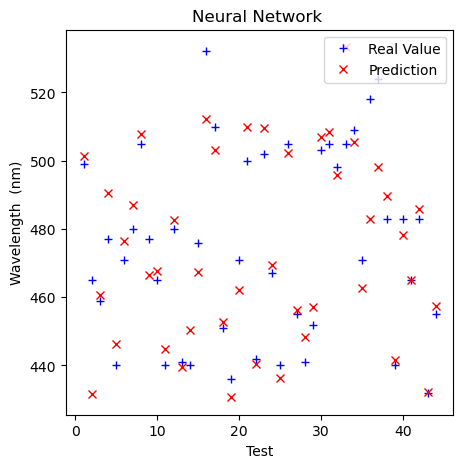

In [23]:
plt.figure(figsize=(5,5))
mu=[*range(1,y_test.size+1,1)]

y_test_py.detach().numpy
prediction_py.detach().numpy

x = np.arange(10)

for i in range (prediction_py.shape[0]): #x,y
    plt.plot(mu[i],y_test_py[i],'+',color='b',label='Real Value')
    plt.plot(mu[i],float(prediction_py[i]),'x',color='r',label='Prediction') 

plt.ylabel('Wavelength  (nm)')
plt.xlabel('Test')
#plt.xlim(0,12)
#plt.ylim(425,520)
plt.title('Neural Network ')

plt.legend(['Real Value', 'Prediction'],loc='upper right')


In [24]:
relative_error_pcg=relative_error*100
relative_error_avg=np.mean(relative_error_pcg)
print("Average Relative Error = " , round(relative_error_avg,3),'%')
nN_accuracy = 100 - np.mean(relative_error_pcg)
print('Accuracy:', round(nN_accuracy, 3), '%.')

Average Relative Error =  1.527 %
Accuracy: 98.473 %.


Text(0.5, 1.0, 'Error Distribution \n Neural Network')

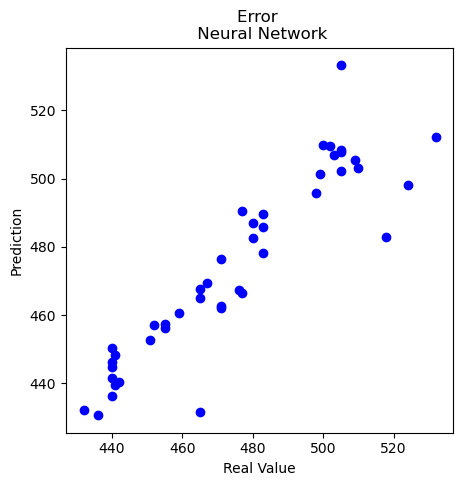

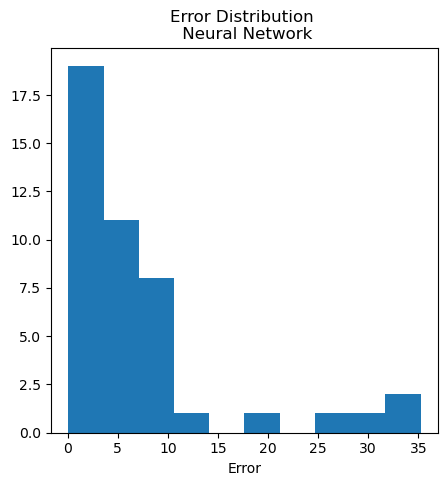

In [25]:
y_test_py.detach().numpy
prediction_py.detach().numpy

plt.figure(figsize=(5,5))
for i in range (len(y_test_py)):
    plt.plot(y_test_py[i],float(prediction_py[i]), "o",color='b')
    
plt.title('Error \n Neural Network')
plt.xlabel('Real Value')
plt.ylabel('Prediction')

plt.figure(figsize=(5,5))
plt.hist(nN_errors)
plt.xlabel('Error')
plt.title('Error Distribution \n Neural Network')

In [26]:
print("Random Forest")

Random Forest


In [27]:
X_train=np.array(X_train)
y_train=np.array(y_train)
rf=RandomForestRegressor(n_estimators=50,random_state=42)
rf.fit(X_train,y_train) #(train_features, train_labels)
rf_predictions=rf.predict(X_test)
rf_predictions = np.reshape(rf_predictions, (rf_predictions.shape[0],1))
rf_errors=100*abs(rf_predictions - y_test)/y_test

print('Average Relative Error:', round(np.mean(rf_errors), 3), '%.')
print('Accuracy: ', 100 - round(np.mean(rf_errors), 3), '%.')

Average Relative Error: 1.338 %.
Accuracy:  98.662 %.


C:\Users\osval\AppData\Local\Temp\ipykernel_2208\1489754617.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train) #(train_features, train_labels)


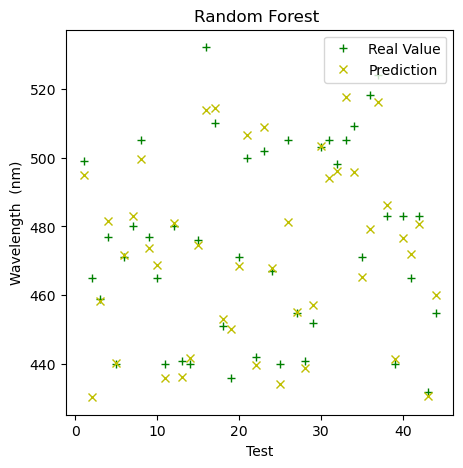

In [28]:
plt.figure(figsize=(5,5))
for i in range (X_test.shape[0]):
    plt.plot(mu[i],y_test[i],'+',color='g',label='Real Value')
    plt.plot(mu[i],float(rf_predictions[i]),'x',color='y',label='Prediction')
plt.ylabel('Wavelength  (nm)')
plt.xlabel('Test')
plt.title('Random Forest ')

plt.legend(['Real Value', 'Prediction'],loc='upper right')

In [29]:
rf_accuracy = 100 - round(np.mean(rf_errors),3)
print('Accuracy:', round(rf_accuracy, 2), '%.')

Accuracy: 98.66 %.


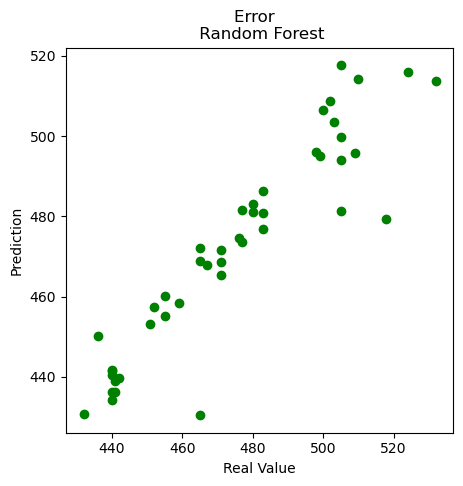

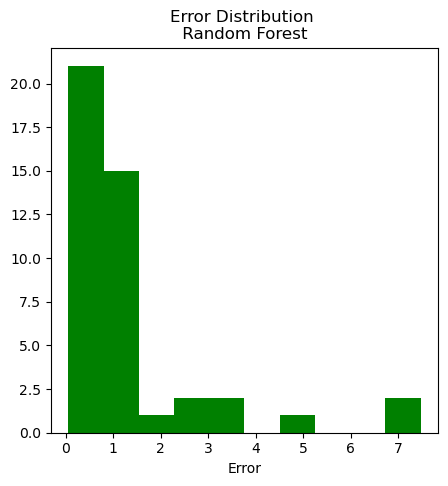

In [30]:
plt.figure(figsize=(5,5))
plt.plot(y_test,rf_predictions, "o",color='g')
plt.xlabel('Real Value')
plt.ylabel('Prediction')
plt.title('Error  \n Random Forest')
plt.show()

plt.figure(figsize=(5,5))
plt.hist(rf_errors,color='g')
plt.xlabel('Error')
plt.title('Error Distribution \n Random Forest ')
plt.show()

In [31]:
print("Support Vector Regression (SVR)")

Support Vector Regression (SVR)


D:\TUM\Computer_Material_Design\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


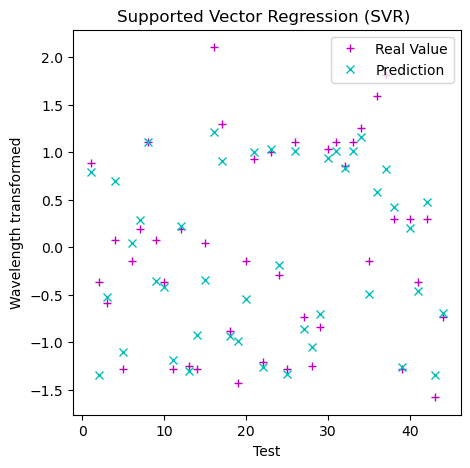

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

X_SVR=X_test  #(44,3)
y_SVR=y_test  #(44,1)

#print(X_SVR)

sc_X_SVR=StandardScaler()
sc_y_SVR=StandardScaler()
X_SVR=sc_X_SVR.fit_transform(X_SVR)
y_SVR=sc_y_SVR.fit_transform(y_SVR)

regressor = SVR(kernel='rbf')
regressor.fit(X_SVR,y_SVR)

y_pred_SVR=regressor.predict(X_SVR)
SVR_errors=np.random.rand(y_pred_SVR.shape[0])

plt.figure(figsize=(5,5))
for i in range (X_SVR.shape[0]):
    plt.plot(mu[i],y_SVR[i],'+',color='m',label='Real Value')
    plt.plot(mu[i],float(y_pred_SVR[i]),'x',color='c',label='Prediction')
    SVR_errors[i]=100*abs(y_pred_SVR[i] - y_SVR[i])/y_SVR[i] #update errors

plt.ylabel('Wavelength transformed')
plt.xlabel('Test')
plt.title('Supported Vector Regression (SVR) ')

plt.legend(['Real Value', 'Prediction'],loc='upper right')

In [35]:
print('Average Relative Error:', abs(round(np.mean((SVR_errors)), 2)), '%.')
SVR_accuracy = 100 - abs(round(np.mean((SVR_errors)), 2))
print('Accuracy:', round(SVR_accuracy, 2), '%.')

Average Relative Error: 33.8 %.
Accuracy: 66.2 %.


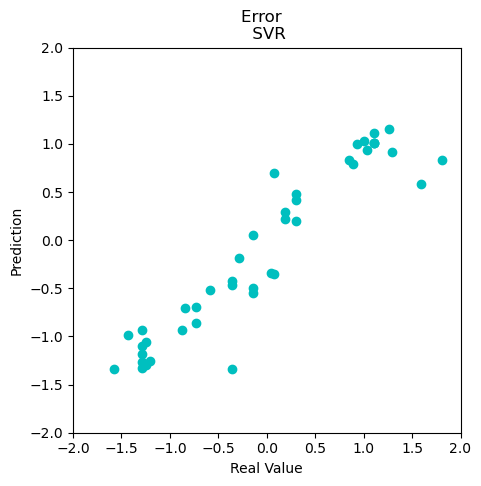

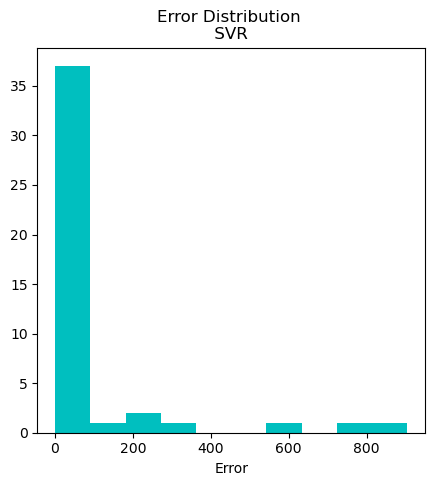

In [36]:
plt.figure(figsize=(5,5))
plt.plot(y_SVR,y_pred_SVR, "o",color='c')
plt.xlabel('Real Value')
plt.ylabel('Prediction')
plt.title('Error  \n SVR')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

plt.figure(figsize=(5,5))
plt.hist(abs(SVR_errors),color='c')
plt.xlabel('Error')
plt.title('Error Distribution \n SVR ')
plt.show()

Text(0.5, 0, 'Models')

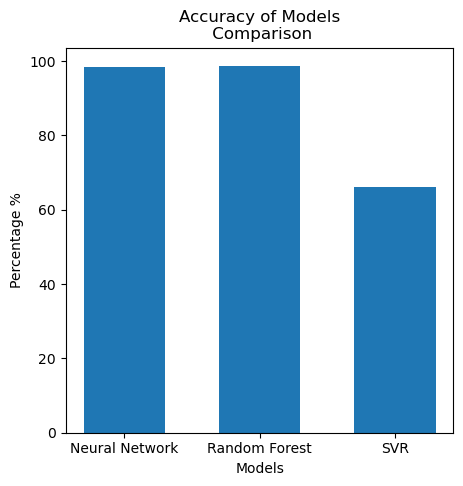

In [37]:
x_errors=['Neural Network','Random Forest','SVR']
y_errors=[nN_accuracy,rf_accuracy,SVR_accuracy]
plt.figure(figsize=(5,5))
plt.bar(x_errors, y_errors,width=[0.6,0.6,0.6])
plt.title('Accuracy of Models\n Comparison')
plt.ylabel('Percentage %')
plt.xlabel('Models')


In [38]:
print("Cross Value Validation")

Cross Value Validation


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

#define predictor and response variables
X_kf = inputs #df[['x1', 'x2']]
y_kf = S_wvl #df['y']

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model_nN=  Network #
model_rf = rf #net.forward #regressor #rf
model_SVR= regressor

#use k-fold CV to evaluate model
scores_rf = cross_val_score(model_rf, X_kf, y_kf, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_SVR = cross_val_score(model_SVR, X_kf, y_kf, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

#view mean absolute error
er_rf_kf=mean(absolute(scores_rf))
er_SVR_kf=mean(absolute(scores_SVR))


In [43]:
from sklearn.model_selection import KFold

n_split=3
nN_error_kf=[]

for train_index,test_index in KFold(n_split).split(inputs):
    x_train_kf,x_test_kf= inputs[train_index],inputs[test_index]
    y_train_kf,y_test_kf= S_wvl[train_index],S_wvl[test_index]
        
    params_kf = list(net.parameters())
    optm_kf = Adam(net.parameters(), lr = 0.1)

    EPOCHS = 500
    criterion_kf = nn.MSELoss()
    
    x_train_kf=torch.tensor(x_train_kf).float()
    x_test_kf=torch.tensor(x_test_kf).float()
    y_train_kf=torch.tensor(y_train_kf).float()
    y_test_kf=torch.tensor(y_test_kf).float()
    
    net.to(device)
    x_train_kf = x_train_kf.to(device)
    y_train_kf= y_train_kf.to(device)
    x_test_kf= x_test_kf.to(device)
    y_test_kf= y_test_kf.to(device)


    for epoch in range(EPOCHS):    
        epoch_loss_kf = 0
    
        net.zero_grad()
        output_kf = net(x_train_kf.float())
        loss_kf =criterion_kf(output_kf,y_train_kf)
        loss_kf.backward() #training of weights 
        optm_kf.step()

        prediction_kf = net.forward(x_test_kf) #Forward pass 
    
        y_test_kf.detach().numpy
        prediction_kf.detach().numpy
        relative_error_kf=np.random.rand(prediction_kf.shape[0])
        nN_errors_kf=np.random.rand(prediction_kf.shape[0])
    
    for i in range(prediction_kf.shape[0]):
        relative_error_kf[i] = float(abs(prediction_kf[i] - y_test_kf[i])/y_test_kf[i])  #Relative Error
        nN_errors_kf[i]=100*abs(prediction_kf[i] - y_test_kf[i])/y_test_kf[i]
            
    nN_error_kf.append(np.mean(nN_errors_kf))

nN_error_mean_kf= mean(nN_error_kf)

print('K-fold Cross Validation')
print('Accuracy of Neuron Network model: ', round(100-nN_error_mean_kf,3),'%')
print('Accuracy of Random Forest model: ', round(100 - er_rf_kf,3) , '%')
print('Accuracy of SVR model: ', round(100 - er_SVR_kf,3) , '%')



K-fold Cross Validation
Accuracy of Neuron Network model:  97.962 %
Accuracy of Random Forest model:  93.816 %
Accuracy of SVR model:  89.767 %


Text(0.5, 0, 'Models')

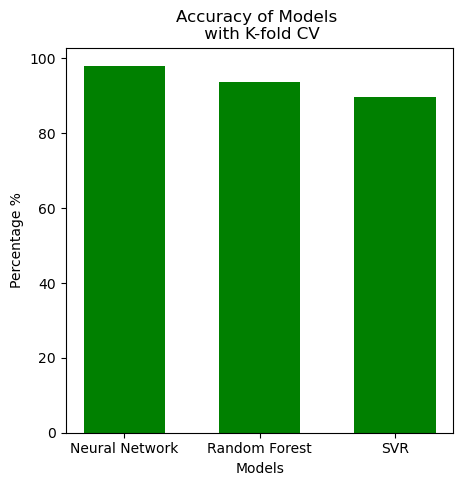

In [44]:
x_errors_kf=['Neural Network','Random Forest','SVR']
y_errors_kf=[round(100-nN_error_mean_kf,3),round(100 - er_rf_kf,3),round(100 - er_SVR_kf,3)]
plt.figure(figsize=(5,5))
plt.bar(x_errors_kf, y_errors_kf,width=[0.6,0.6,0.6],color='g')
plt.title('Accuracy of Models \n with K-fold CV')
plt.ylabel('Percentage %')
plt.xlabel('Models')

In [45]:
import webcolors

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

In [46]:
import sys
import os
import traceback
import optparse
import time
import logging

#Function actually used to change the values of wavelength into colours
def wavelength_to_rgb(wavelength, gamma=0.8):
    '''
    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    '''

    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    R *= 255
    G *= 255
    B *= 255
    return (int(R), int(G), int(B))

In [47]:
import matplotlib.colors
#This function is only used to be able to print the figure containing the wavelength with the colors 
def wavelength_to_rgb_2(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)


In [51]:
float(y_test[0])
rgb=float(y_test[1])
freq=wavelength_to_rgb(rgb)

In [52]:
freq=[]
#[*range(1,y_test.shape[0]+1,1)]
#freq=np.array(freq)

for i in range (prediction_py.shape[0]):
    rgb=float(prediction_py[i])
    freq.append(wavelength_to_rgb(rgb))
#print(freq)

In [53]:
clr_name=[]
for i in range(len(freq)):
    clr_name.append(closest_colour(freq[i]))
#print(clr_name)

<IPython.core.display.Javascript object>


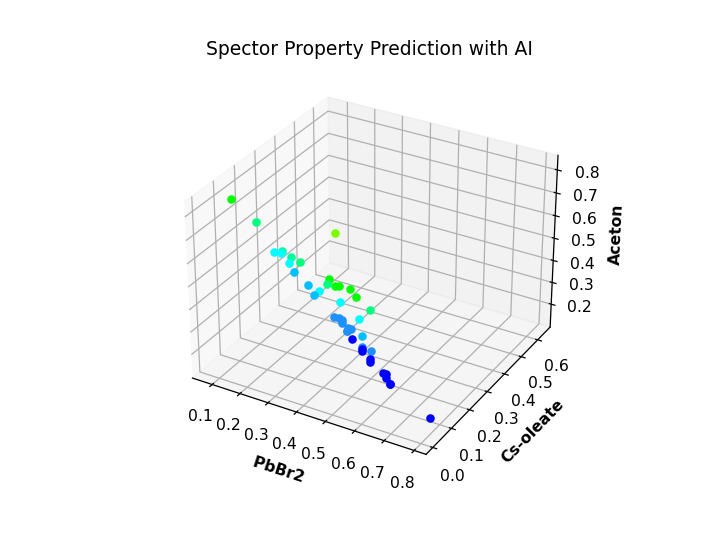

[0.27118644]
[0.6779661]
[0.05084746]


<IPython.core.display.Javascript object>


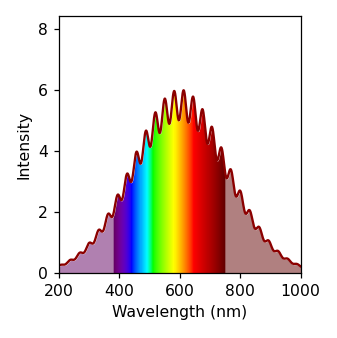

In [54]:
from mpl_toolkits import mplot3d
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
print(Pb[0])
print(Ac[0])
print(Cs[0])

for i in range (X_test.shape[0]):
    pl=X_test[i]
    pl_x=pl[0] #Pb
    pl_y=pl[1] #Cs
    pl_z=pl[2] #Ac
    sctt=ax.scatter3D(pl_x,pl_y,pl_z,c=[clr_name[i]])

ax.set_xlabel('PbBr2 ', fontweight ='bold')
ax.set_ylabel('Cs-oleate', fontweight ='bold')
ax.set_zlabel('Aceton', fontweight ='bold')
ax.set_title('Spector Property Prediction with AI')


#ax.view_init(10, 45) #Isometric view
#ax.view_init(10, 90) #PbBr2
#ax.view_init(90, 0) # Cs-oleate
#ax.view_init(0, 90) # Aceton

clim=(350,780)
norm = plt.Normalize(*clim)
wl = np.arange(clim[0],clim[1]+1,2)
colorlist = list(zip(norm(wl),[wavelength_to_rgb_2(w) for w in wl]))
spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)

fig, axs = plt.subplots(1, 1, figsize=(3,3), tight_layout=True)

wavelengths = np.linspace(200, 1000, 1000)
spectrum = (5 + np.sin(wavelengths*0.1)**2) * np.exp(-0.00002*(wavelengths-600)**2)
plt.plot(wavelengths, spectrum, color='darkred')

y = np.linspace(0, 6, 100)
X,Y = np.meshgrid(wavelengths, y)

extent=(np.min(wavelengths), np.max(wavelengths), np.min(y), np.max(y))

plt.imshow(X, clim=clim,  extent=extent, cmap=spectralmap, aspect='auto')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.fill_between(wavelengths, spectrum, 8, color='w')